In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [5]:

df_train = pd.read_csv('trainset.csv')
df_train.head(60)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [6]:
train_set = df_train.iloc[:,1:2].values
train_set.shape

(1259, 1)

In [7]:

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [8]:

X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)

In [9]:
X_train

array([[0.01011148, 0.01388614, 0.01690727, ..., 0.07456192, 0.0698898 ,
        0.068047  ],
       [0.01388614, 0.01690727, 0.02109298, ..., 0.0698898 , 0.068047  ,
        0.06189514],
       [0.01690727, 0.02109298, 0.02115463, ..., 0.068047  , 0.06189514,
        0.06842378],
       ...,
       [0.84110805, 0.83286147, 0.83699857, ..., 0.98586493, 0.9805695 ,
        0.97637719],
       [0.83286147, 0.83699857, 0.83491622, ..., 0.9805695 , 0.97637719,
        0.97543954],
       [0.83699857, 0.83491622, 0.85037519, ..., 0.97637719, 0.97543954,
        0.9674549 ]])

In [10]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

X_train1

array([[[0.01011148],
        [0.01388614],
        [0.01690727],
        ...,
        [0.07456192],
        [0.0698898 ],
        [0.068047  ]],

       [[0.01388614],
        [0.01690727],
        [0.02109298],
        ...,
        [0.0698898 ],
        [0.068047  ],
        [0.06189514]],

       [[0.01690727],
        [0.02109298],
        [0.02115463],
        ...,
        [0.068047  ],
        [0.06189514],
        [0.06842378]],

       ...,

       [[0.84110805],
        [0.83286147],
        [0.83699857],
        ...,
        [0.98586493],
        [0.9805695 ],
        [0.97637719]],

       [[0.83286147],
        [0.83699857],
        [0.83491622],
        ...,
        [0.9805695 ],
        [0.97637719],
        [0.97543954]],

       [[0.83699857],
        [0.83491622],
        [0.85037519],
        ...,
        [0.97637719],
        [0.97543954],
        [0.9674549 ]]])

In [11]:

model = Sequential([layers.SimpleRNN(50,input_shape=(60,1)),
                    layers.Dense(1)
                    ])

In [12]:
model.compile(optimizer='Adam', loss='mae')

In [13]:
model.fit(X_train1,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 15ms/step - loss: 0.1307
Epoch 2/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0216
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0192
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0157
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0136
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0141
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0134
Epoch 9/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0135
Epoch 10/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0137
Epoch 11/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0117
Epoch 12/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0117
Epoch 13/100
38/38 [=====

In [14]:

df_test=pd.read_csv("testset.csv")
test_set = df_test.iloc[:,1:2].values

In [15]:
dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis=0)

In [16]:

inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []

In [17]:
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [18]:


predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 6ms/step


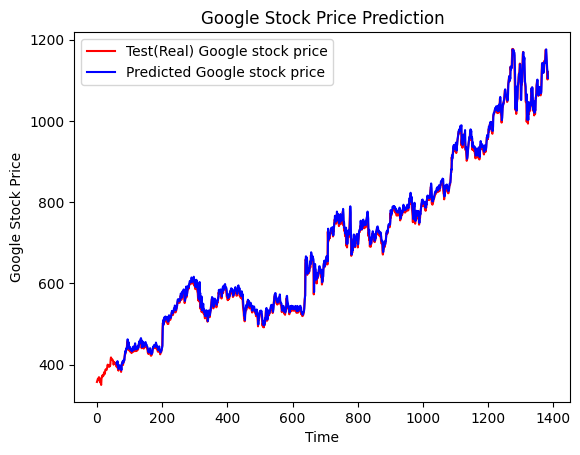

In [23]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

545818.5798560316